# Project 5 : Wrangling and Analyze Data

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

# Gathering Data for this Project:


Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv


2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

**Import all packages needed:**

In [2142]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import json
import zipfile

**Gathering Data:**

1.The WeRateDogs Twitter archive.


In [2143]:
twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced-2.csv")
twitter_archive_enhanced.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [2144]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Gathering Data:**

2.The tweet image prediction

In [2145]:
#URL downloaded programatically 

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [2146]:
#Read TSV file
image_predict = pd.read_csv('image-predictions.tsv', sep='\t' )

In [2147]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [2148]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Gathering Data:**

3.Query the Twitter API

I sent a request for Twitter developer account and the Twitter replied  : " Thanks for your response. We still need some more details for our review of your Twitter developer account application". I sent to them more deatiles and I don't get any respond until now.

In [2149]:
with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()


z_tweets.namelist()

['tweet-json copy']

In [2150]:
with open('tweet-json copy', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')


tweet_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [2151]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# Assessing Data for this Project:


After gathering each of the above pieces of data, assess them visually and programmatically for **quality** and **tidiness** issues. 

In [2152]:
twitter_archive_enhanced.sample(20)

C:\ProgramData\conda\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1794,677328882937298944,NaN,NaN,2015-12-17 03:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10,10,Derek,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None
1013,747219827526344708,NaN,NaN,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
455,818307523543449600,NaN,NaN,2017-01-09 04:04:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Moose. He doesn't want his...,8.164506e+17,4.196984e+09,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,None,None,None,None


In [2153]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [2154]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [2155]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [2156]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [2157]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [2158]:
twitter_archive_enhanced['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [2159]:
sum(twitter_archive_enhanced['tweet_id'].duplicated())

0

In [2160]:
twitter_archive_enhanced['tweet_id'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [2161]:
twitter_archive_enhanced.iloc[10]

tweet_id                                                     890006608113172480
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-26 00:31:25 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Koda. He is a South Australian decksha...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/890006608...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [2162]:
twitter_archive_enhanced[['tweet_id','source']].iloc[10]

tweet_id                                   890006608113172480
source      <a href="http://twitter.com/download/iphone" r...
Name: 10, dtype: object

In [2163]:
twitter_archive_enhanced.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [2164]:
image_predict.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1968,868552278524837888,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,whippet,0.378151,True,Italian_greyhound,0.275935,True,American_Staffordshire_terrier,0.094991,True
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,miniature_pinscher,0.516284,True,kelpie,0.227402,True,vizsla,0.103246,True
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True
797,691090071332753408,https://pbs.twimg.com/media/CZc-u7IXEAQHV1N.jpg,1,barrow,0.241637,False,tub,0.238450,False,bathtub,0.167285,False
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True


In [2165]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [2166]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [2167]:
image_predict.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [2168]:
image_predict['tweet_id']

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [2169]:
sum(image_predict['jpg_url'].duplicated())

66

In [2170]:
image_predict.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [2171]:
image_predict.iloc[5]

tweet_id                                 666050758794694657
jpg_url     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
img_num                                                   1
p1                                     Bernese_mountain_dog
p1_conf                                            0.651137
p1_dog                                                 True
p2                                         English_springer
p2_conf                                            0.263788
p2_dog                                                 True
p3                               Greater_Swiss_Mountain_dog
p3_conf                                           0.0161992
p3_dog                                                 True
Name: 5, dtype: object

In [2172]:
image_predict.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
giant_panda             1
EntleBucher             1
trombone                1
restaurant              1
lawn_mower              1
Name: p1, Length: 378, dtype: int64

In [2173]:
image_predict[['tweet_id','jpg_url']].iloc[10]

tweet_id                                 666063827256086533
jpg_url     https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
Name: 10, dtype: object

In [2174]:
tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
517,2016-12-19 01:26:42+00:00,810657578271330305,810657578271330304,This is Pavlov. His floatation device has fail...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810657562332954624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12192,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2124,2015-11-27 20:30:30+00:00,670338931251150849,670338931251150848,This is Butters. He's not ready for Thanksgivi...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670338915237167104, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,451,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
227,2017-04-01 16:41:12+00:00,848213670039564288,848213670039564288,Jerry just apuppologized to me. He said there ...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.482121e+17,...,8834,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
1734,2015-12-23 17:55:32+00:00,679722016581222400,679722016581222400,This is Mike. He is a Jordanian Frito Pilates....,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679722011451604992, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1817,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2149,2015-11-26 01:00:28+00:00,669682095984410625,669682095984410624,Meet Louie. He just pounded that bottle of win...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669682090091216896, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,375,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2337,2015-11-16 03:55:04+00:00,666102155909144576,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,False,"[0, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666102150364286977, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,81,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1569,2016-01-14 18:33:48+00:00,687704180304273409,687704180304273408,Say hello to Blakely. He thinks that's a hat. ...,False,"[0, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687704170560749568, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2660,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
42,2017-07-09 21:29:42+00:00,884162670584377345,884162670584377344,Meet Yogi. He doesn't have any important dog m...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 884162662212489221, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20771,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1594,2016-01-10 20:41:33+00:00,686286779679375361,686286779679375360,When bae calls your name from across the room....,False,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,4392,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
447,2017-01-11 02:21:57+00:00,819006400881917954,819006400881917952,This is Sunny. She was also a very good First ...,False,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819006388206649344, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,49960,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [2175]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [2176]:
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [2177]:
tweet_json['id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: id, Length: 2354, dtype: int64

In [2178]:
list(tweet_json)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [2179]:
sum(tweet_json['id'].duplicated())

0

In [2180]:
tweet_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [2181]:
tweet_json.iloc[10]

created_at                                               2017-07-26 00:31:25+00:00
id                                                              890006608113172480
id_str                                                          890006608113172480
full_text                        This is Koda. He is a South Australian decksha...
truncated                                                                    False
display_text_range                                                        [0, 130]
entities                         {'hashtags': [{'text': 'BarkWeek', 'indices': ...
extended_entities                {'media': [{'id': 890006600089468928, 'id_str'...
source                           <a href="http://twitter.com/download/iphone" r...
in_reply_to_status_id                                                          NaN
in_reply_to_status_id_str                                                      NaN
in_reply_to_user_id                                                            NaN
in_r

In [2182]:
tweet_json[['id','source']].iloc[120]

id                                       869596645499047938
source    <a href="http://twitter.com/download/iphone" r...
Name: 120, dtype: object

In [2183]:
twitter_archive_enhanced.shape[0], image_predict.shape[0] , tweet_json.shape[0]


(2356, 2075, 2354)

# Data Quality issues: 

**1.twitter_archive_enhanced:**

A - retweeted_status_timestamp is a **timestamp** not a object.

B - Coulumns : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id is a **integers** not a float.
 
C - in some columns there are null objects called as **NaN**.

D - The numerator and denominator columns have **invalid values**.

E - columns doggo, floofer, pupper, puppo appears as **None**



**2.image_predict:**

A - Deleted **66** duplicated jpg url.

B - Drop columns that won't be used for analysis

C - p1_dog, p2_dog and p3_dog columns should be merged

**3.tweet_json:**

A - I will keep original tweets only.

 

# Tidiness Issues:


 - image_predict we will use those columns only  jpg_url and tweet_id.
 - JOINs dataframe in one dataset: **twitter_archive_enhanced**  , **image_predict** , **tweet_json**

# Cleaning Data for this Project


In [2184]:
# make a copy of the datasets
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predict_clean = image_predict.copy()
tweet_json_clean =  tweet_json.copy()

# 1.twitter_archive_enhanced_clean


In [2185]:
# Data type of each column
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [2186]:
# Frequency counts: source
twitter_archive_enhanced_clean.source.value_counts(dropna=False) 

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [2187]:
# Frequency counts: name
twitter_archive_enhanced_clean['name'].value_counts(dropna=False).head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [2188]:
# Number of column that contains missing/NA values
twitter_archive_enhanced_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [2189]:
# Number of columns that does not contains missing/NA values
twitter_archive_enhanced_clean.notnull().sum()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [2237]:
# replace name of text source coulumn:
twitter["source"]= twitter["source"].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "Twitter for iPhone")
twitter["source"]= twitter["source"].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Make a Scene")
twitter["source"]= twitter["source"].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Twitter Web Client")
twitter["source"]= twitter["source"].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', "TweetDeck")


In [2191]:
# fillna with a replace missing values with that zero value:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.fillna(0)

In [2192]:
# Counts value of rating numerator:
twitter_archive_enhanced_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [2193]:
# Counts value of rating denominator:
twitter_archive_enhanced_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

# 2.Cleaning Data for image_predict


In [2194]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [2195]:
image_predict_clean.drop_duplicates()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [2196]:
# Number of value  for img_num:
image_predict_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

# 3.Cleaning Data for tweet_json


In [2197]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [2198]:
# Delete columns no needed:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
 'retweeted_status_timestamp', 'expanded_urls'], 1)

In [2199]:
twitter_archive_enhanced_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_enhanced_clean[['rating_numerator','rating_denominator']].astype(float)


In [2200]:
twitter_archive_enhanced_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None


In [2201]:
twitter_archive_enhanced_clean = pd.melt(twitter_archive_enhanced_clean, id_vars=['tweet_id',                                          
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

In [2202]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('dogs', 1)


In [2203]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [2204]:
twitter_archive_enhanced_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage
4614,667724302356258817,What a dog to start the day with. Very calm. L...,7.0,10.0,None,None
4615,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None
4616,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10.0,None,None
4617,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,None,None
4618,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None


In [2205]:
twitter_archive_enhanced_clean['dogs_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

In [2206]:
twitter_archive_enhanced_clean.dtypes

tweet_id                int64
text                   object
rating_numerator      float64
rating_denominator    float64
name                   object
dogs_stage             object
dtype: object

In [2207]:
# Change data type for 'rating_numerator' & 'rating_denominator' to Float
twitter_archive_enhanced_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_enhanced_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 4614 to 9615
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   float64
 4   name                2356 non-null   object 
 5   dogs_stage          2356 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 128.8+ KB


In [2208]:
twitter_archive_enhanced_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage
5841,729463711119904772,Meet Pupcasso. You can't afford his art. 13/10...,13.0,10.0,Pupcasso,None
9893,816829038950027264,RT @dog_rates: This is Betty. She's assisting ...,12.0,10.0,Betty,puppo
5414,786036967502913536,RT @dog_rates: This is Scout. He really wants ...,11.0,10.0,Scout,None
5605,759446261539934208,No no no this is all wrong. The Walmart had to...,10.0,10.0,None,None
5581,761745352076779520,Guys.. we only rate dogs. Pls don't send any m...,11.0,10.0,None,None
6466,678798276842360832,This is Linda. She fucking hates trees. 7/10 h...,7.0,10.0,Linda,None
5586,761292947749015552,Meet Bonaparte. He's pupset because it's cloud...,11.0,10.0,Bonaparte,None
5513,772581559778025472,Guys this is getting so out of hand. We only r...,10.0,10.0,a,None
6041,705898680587526145,Meet Max. He's a Fallopian Cephalopuff. Eyes a...,10.0,10.0,Max,None
6129,698549713696649216,This is Claude. He's trying to be seductive bu...,9.0,10.0,Claude,None


In [2209]:
# Create new coulumns for Ratings 
twitter_archive_enhanced_clean['Ratings'] = 10 * twitter_archive_enhanced_clean['rating_numerator'] / twitter_archive_enhanced_clean['rating_denominator'].astype(float)

In [2210]:
# Number of duplicates for JPG URL:
image_predict_clean.jpg_url.duplicated().sum()

66

In [2211]:
# delet duplicates for JPG URL:
image_predict_clean = image_predict_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [2212]:
dog_type = []
confidence_list = []

def image(image_predict_clean):
    if image_predict_clean['p1_dog'] == True:
        dog_type.append(image_predict_clean['p1'])
        confidence_list.append(image_predict_clean['p1_conf'])
    elif image_predict_clean['p2_dog'] == True:
        dog_type.append(image_predict_clean['p2'])
        confidence_list.append(image_predict_clean['p2_conf'])
    elif image_predict_clean['p3_dog'] == True:
        dog_type.append(image_predict_clean['p3'])
        confidence_list.append(image_predict_clean['p3_conf'])
    else:
        dog_type.append('Wrong')
        confidence_list.append('Wrong')

#series objects having index the image_prediction_clean column.        
image_predict_clean.apply(image, axis=1)

#create new columns
image_predict_clean['dog_type'] = dog_type
image_predict_clean['confidence_list'] = confidence_list

In [2213]:
image_predict_clean = image_predict_clean[image_predict_clean['dog_type'] != 'Wrong']


In [2214]:
list(image_predict_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_type',
 'confidence_list']

In [2215]:
image_predict_clean.head(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [2216]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [2217]:
# Delete columns no needed:
image_predict_clean = image_predict_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf', 
 'p2_dog', 'p3','p3_conf','p3_dog'], 1)

In [2218]:
#rename id_str column to tweet_id:
tweet_json_clean = tweet_json_clean.rename(columns={'id_str': 'tweet_id'})

In [2219]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)
tweet_json_clean['tweet_id'].dtypes

dtype('int32')

In [2220]:
# Delete columns no needed:
tweet_json_clean = tweet_json_clean.drop(['created_at','id','full_text','truncated','display_text_range','entities', 'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name','user','geo','coordinates','place','contributors','is_quote_status','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang','quoted_status_id','quoted_status_id_str','quoted_status'], 1)

In [2221]:
tweet_json_clean.head(5)

,tweet_id,source,retweet_count,favorite_count,retweeted_status
0,-648585216,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,NaN
1,1100394496,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,NaN
2,-1286119424,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,NaN
3,-1885904896,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,NaN
4,1079468032,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,NaN


In [2222]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int32 
 1   source            2354 non-null   object
 2   retweet_count     2354 non-null   int64 
 3   favorite_count    2354 non-null   int64 
 4   retweeted_status  179 non-null    object
dtypes: int32(1), int64(2), object(2)
memory usage: 82.9+ KB


# Join and Combine Data 

In [2223]:
twitter_archive = pd.merge(twitter_archive_enhanced_clean, 
                      tweet_json_clean, 
                      how = 'outer', on = ['tweet_id'])

In [2224]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710 entries, 0 to 4709
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            4710 non-null   int64  
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   float64
 4   name                2356 non-null   object 
 5   dogs_stage          2356 non-null   object 
 6   Ratings             2356 non-null   float64
 7   source              2354 non-null   object 
 8   retweet_count       2354 non-null   float64
 9   favorite_count      2354 non-null   float64
 10  retweeted_status    179 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 441.6+ KB


In [2225]:
twitter = pd.merge(twitter_archive, 
                      image_predict_clean, 
                      how = 'outer', on = ['tweet_id'])

In [2226]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710 entries, 0 to 4709
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            4710 non-null   int64  
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   float64
 4   name                2356 non-null   object 
 5   dogs_stage          2356 non-null   object 
 6   Ratings             2356 non-null   float64
 7   source              2354 non-null   object 
 8   retweet_count       2354 non-null   float64
 9   favorite_count      2354 non-null   float64
 10  retweeted_status    179 non-null    object 
 11  jpg_url             1691 non-null   object 
 12  img_num             1691 non-null   float64
 13  dog_type            1691 non-null   object 
 14  confidence_list     1691 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 588.8+

# Storing Data 

In [2227]:
# saving the dataframe
twitter.to_csv('Twitter.csv', index=False ,encoding = 'utf-8')

# Visualizing Data

**1. What are the most type of dogs frequency?**

In [2228]:
most_type_dogs= twitter['dog_type'].value_counts().head(15)
V1 = most_type_dogs.sort_values()

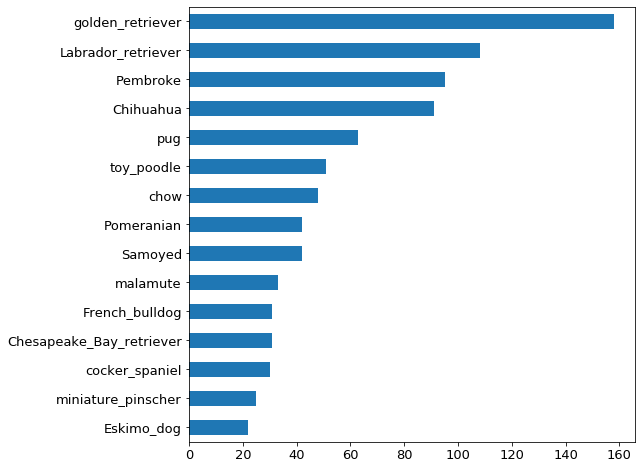

In [2229]:
V1.plot(kind="barh", fontsize=13, figsize=(8, 8))

**2. what is the most sourse of tweets ?**

In [2238]:
V2 = twitter['source'].value_counts().head(15)

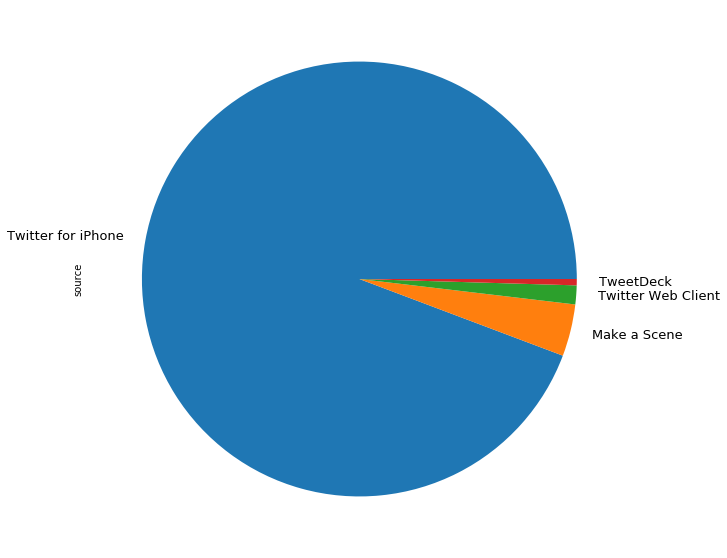

In [2239]:
V2.plot(kind="pie", figsize=(10, 10), fontsize=13)

**3. is there a correlation between favorite_count vs retweet_count  ?**

In [2232]:
T3 = twitter[['tweet_id', 'favorite_count', 'retweet_count','Ratings']]

In [2233]:
T3 = T3.replace(np.nan, 0)

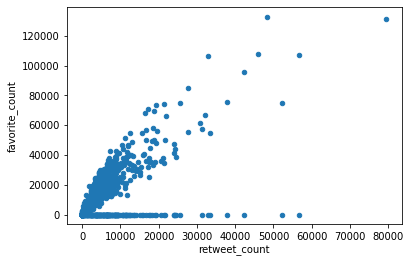

In [2234]:
T3.plot(x='retweet_count', y='favorite_count', kind='scatter')

**4. What are the top five tweet get highest rate  ?**

In [2235]:
V4 = twitter['dogs_stage'].value_counts()

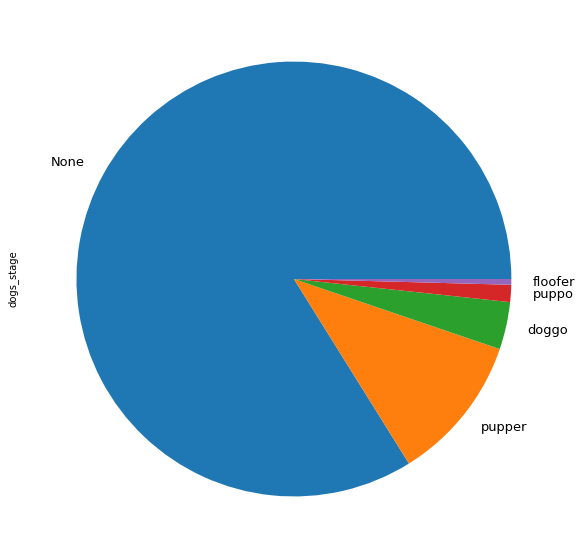

In [2236]:
V4.plot(kind="pie", figsize=(10, 10), fontsize=13)